# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [28]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
# Black, dark gray, light gray, white
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

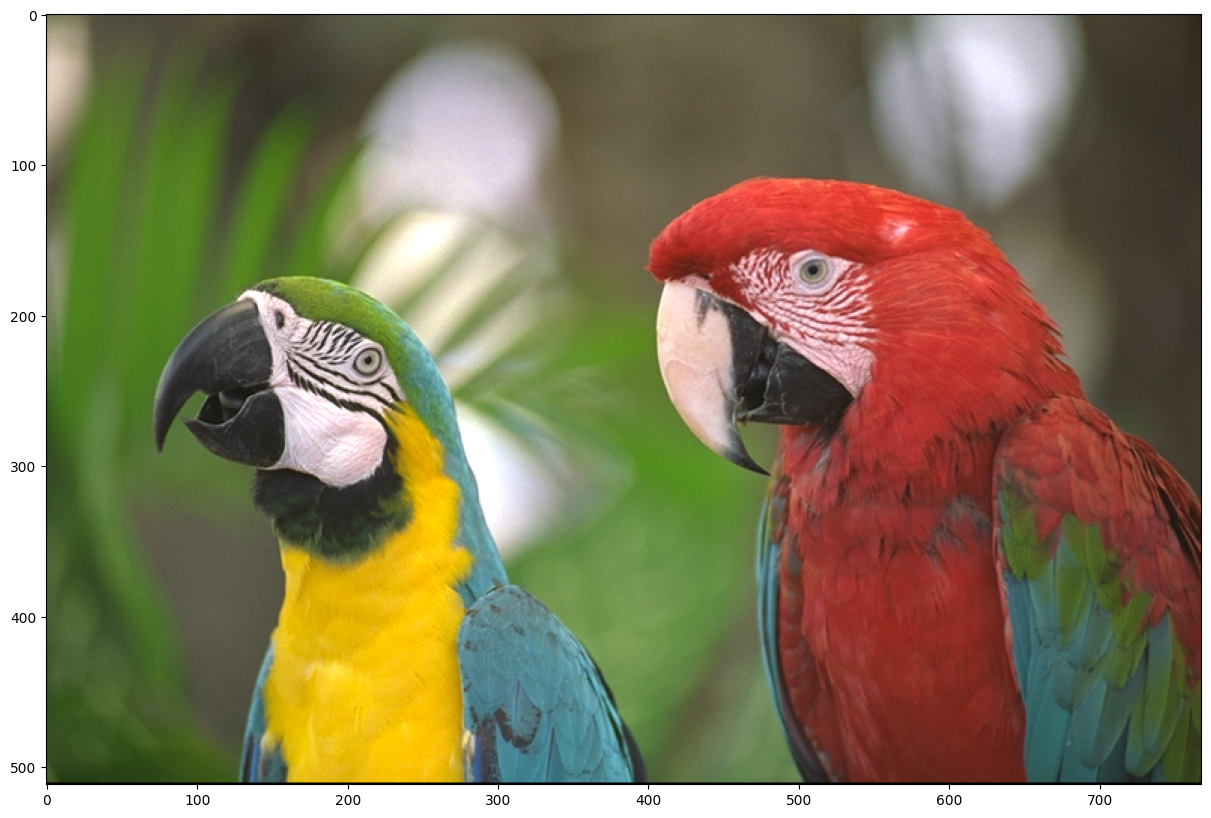

In [29]:
# Load image
img = cv2.imread('../data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [30]:
kmeans = KMeans(n_clusters=256).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_

Using the colour pallette, let's quantize the original image.

In [31]:
# Cast the image to float
img = img.astype(float)
# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]

        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[np.argmin(np.linalg.norm(colors - pixel, axis=1))]

        # # Apply quantization
        quantized[r, c, :] = new_pixel

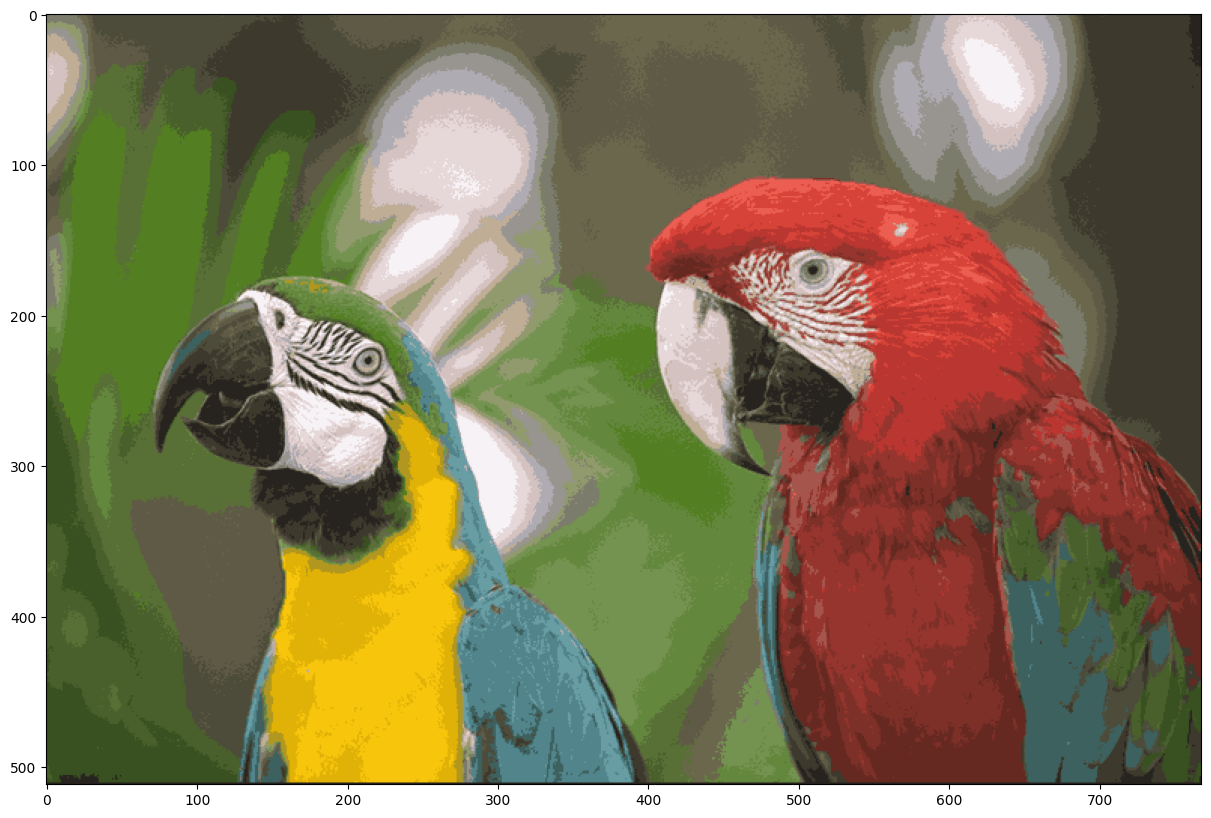

In [32]:
# Show quantized image (don't forget to cast back to uint8)
quantized = quantized.astype(int)
plt.imshow(quantized)

In [33]:
# Compute average quantization error
avg_quant_error = np.mean((img - quantized) ** 2)
print(avg_quant_error)


77.80555470784505


#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [34]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
img_tmp = img_tmp.astype(float)
dithering = np.zeros_like(img)

for r in range(1, rows - 1):
    for c in range(1, cols - 1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[np.argmin(np.linalg.norm(colors - pixel, axis=1))]

        # Compute quantization error
        quant_error = pixel - new_pixel

        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c + 1, :] += 7 * quant_error / 16
        img_tmp[r + 1, c - 1, :] += 3 * quant_error / 16
        img_tmp[r + 1, c, :] += 5 * quant_error / 16
        img_tmp[r + 1, c + 1, :] += 1 * quant_error / 16

        # Apply dithering
        dithering[r, c, :] = new_pixel

(<Axes: >, <matplotlib.image.AxesImage at 0x13b8b53e4b0>)

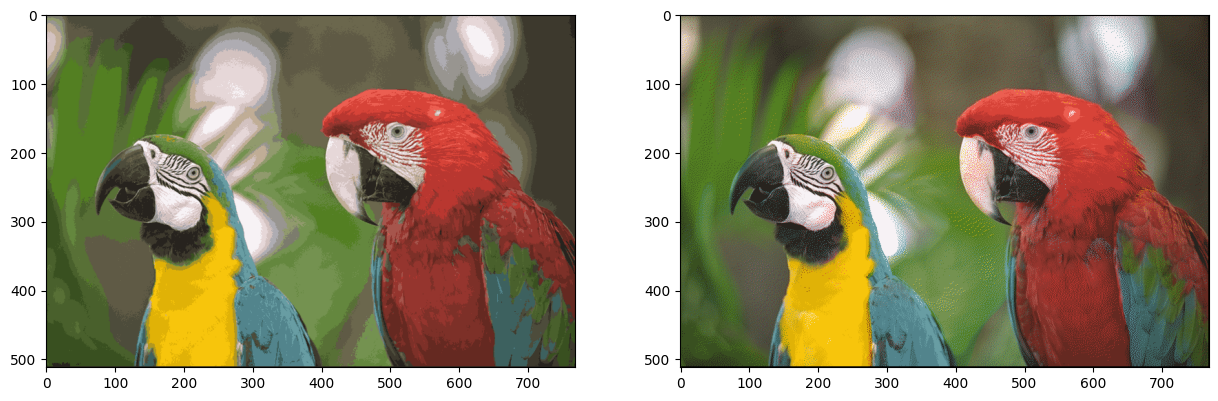

In [35]:
dithering = dithering.astype(int)
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

In [36]:
# Compute average quantization error for dithered image
avg_dith_error = np.mean((img - dithering) ** 2)
print(avg_dith_error)

457.0180130004883


### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

Apply FS dithering the same way you did before.
* How does the result look like to you?
    
    The result looks much better of course 
* What happens if we use 32 colours?

    Image will have even more details, however in that case 4 bits will not be enough to store information about each color
* And what happens if we use 256 colours?

    Image will have much more details, however in that case we need to use 8 bits to store information about each color